<a href="https://colab.research.google.com/github/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/blob/main/Karthik_Tummala_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [64]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
pip install pandas scikit-learn imbalanced-learn nltk

In [66]:
url = 'https://github.com/KarthikTummala18/INFO-5731-Computational-Methods-for-Information-Systems-/blob/main/Labelled_data.csv?raw=true'

In [67]:
df = pd.read_csv(url)

In [68]:
df.head(10)

,document_id,clean_text,sentiment
0,0,No issues.,Neutral
1,1,"Purchased this for my device, it worked as adv...",Neutral
2,2,it works as expected. I should have sprung for...,Neutral
3,3,This think has worked out great.Had a diff. br...,Neutral
4,4,"Bought it with Retail Packaging, arrived legit...",Neutral
5,5,It's mini storage. It doesn't do anything els...,Neutral
6,6,I have it in my phone and it never skips a bea...,Neutral
7,7,It's hard to believe how affordable digital ha...,Neutral
8,8,Works in a HTC Rezound. Was running short of ...,Neutral
9,9,"in my galaxy s4, super fast card, and am total...",Neutral


In [69]:
print(df['sentiment'].value_counts())

sentiment
Neutral     4595
Negative     255
Positive      65
Name: count, dtype: int64


In [70]:
df = df.dropna()

In [71]:
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

In [72]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['sentiment_encoded']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

re_df = pd.DataFrame({'sentiment': label_encoder.inverse_transform(y_resampled)})
print("\nResampled Class Distribution:")
print(re_df['sentiment'].value_counts())


Resampled Class Distribution:
sentiment
Neutral     4594
Negative    4594
Positive    4594
Name: count, dtype: int64


In [73]:
df.head(10)

,document_id,clean_text,sentiment,sentiment_encoded
0,0,No issues.,Neutral,1
1,1,"Purchased this for my device, it worked as adv...",Neutral,1
2,2,it works as expected. I should have sprung for...,Neutral,1
3,3,This think has worked out great.Had a diff. br...,Neutral,1
4,4,"Bought it with Retail Packaging, arrived legit...",Neutral,1
5,5,It's mini storage. It doesn't do anything els...,Neutral,1
6,6,I have it in my phone and it never skips a bea...,Neutral,1
7,7,It's hard to believe how affordable digital ha...,Neutral,1
8,8,Works in a HTC Rezound. Was running short of ...,Neutral,1
9,9,"in my galaxy s4, super fast card, and am total...",Neutral,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"\nTrain set size: {len(X_train)}, Test set size: {len(X_test)}")


Train set size: 11025, Test set size: 2757


In [75]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [76]:
def preprocess_clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'<.*?>', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return ' '.join(lemmatized_tokens)

In [77]:
df['clean_text'] = df['clean_text'].apply(preprocess_clean_text)

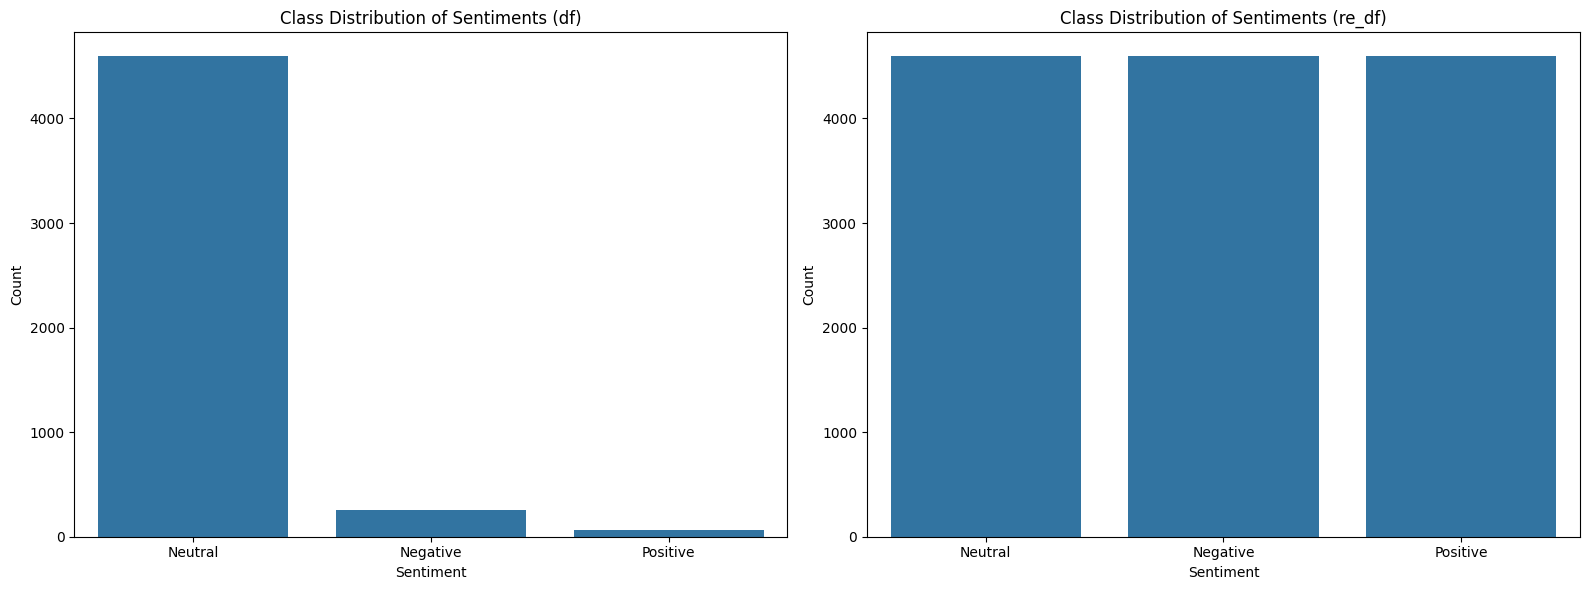

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='sentiment', data=df, ax=axes[0])
axes[0].set_title('Class Distribution of Sentiments (df)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.countplot(x='sentiment', data=re_df, ax=axes[1])
axes[1].set_title('Class Distribution of Sentiments (re_df)')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

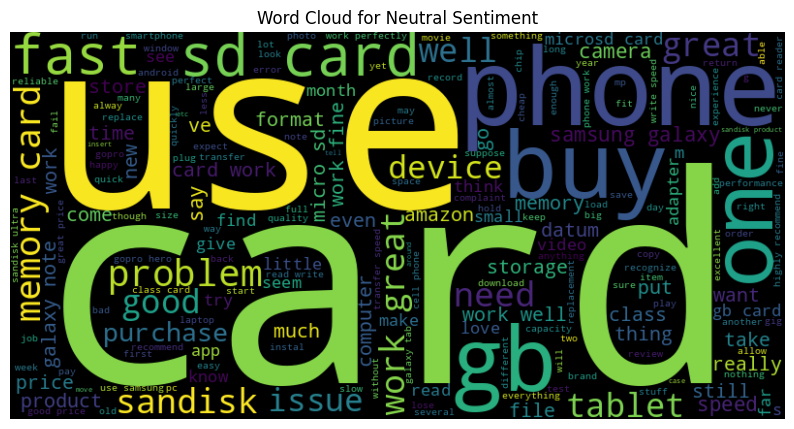

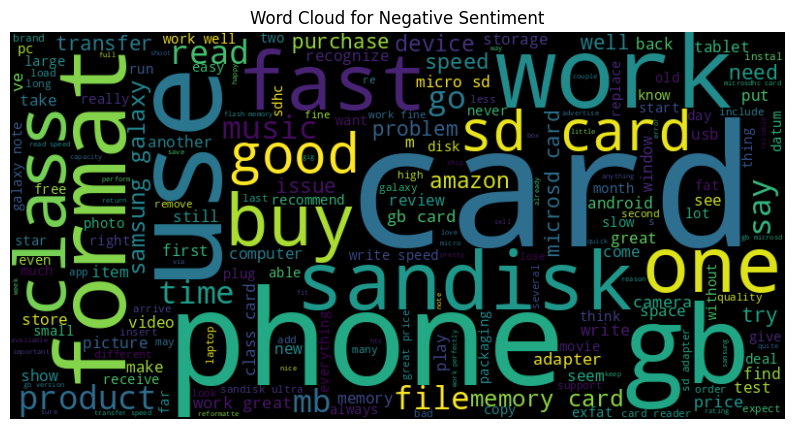

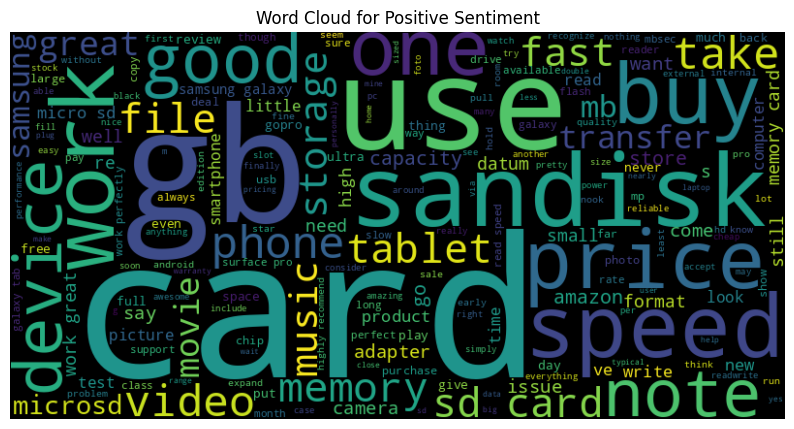

In [79]:
def plot_wordcloud(data, sentiment):
    sentiment_text = ' '.join(data[data['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400).generate(sentiment_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

for sentiment in df['sentiment'].unique():
    plot_wordcloud(df, sentiment)

In [80]:
from nltk.util import ngrams as nltk_ngrams

In [81]:
def n_grams(text_series, n=1):
    ngrams = []
    for text in text_series:
        tokens = text.split()
        ngrams.extend(list(nltk_ngrams(tokens, n)))
    return ngrams

In [82]:
unigrams = n_grams(df['clean_text'], 1)
frequency_unigram = nltk.FreqDist(unigrams)
top_uni = frequency_unigram.most_common(10)
print("Top 10 Unigrams:", top_uni)

Top 10 Unigrams: [(('card',), 5535), (('work',), 2729), (('use',), 2187), (('phone',), 1908), (('gb',), 1725), (('not',), 1525), (('great',), 1458), (('memory',), 1378), (('buy',), 1378), (('sandisk',), 1315)]


In [20]:
bi = n_grams(df['clean_text'], 2)
frequency_bi = nltk.FreqDist(bi)
top_bi = frequency_bi.most_common(10)
print("Top 10 Bigrams:", top_bi)

Top 10 Bigrams: [(('sd', 'card'), 829), (('do', 'not'), 730), (('memory', 'card'), 665), (('work', 'great'), 588), (('samsung', 'galaxy'), 478), (('I', 've'), 433), (('micro', 'sd'), 353), (('I', 'm'), 337), (('card', 'work'), 305), (('galaxy', 'note'), 273)]


In [21]:
tri = n_grams(df['clean_text'], 3)
frequency_tri = nltk.FreqDist(tri)
top_tri = frequency_tri.most_common(10)
print("Top 10 Trigrams:", top_tri)

Top 10 Trigrams: [(('micro', 'sd', 'card'), 216), (('samsung', 'galaxy', 'note'), 119), (('do', 'not', 'know'), 75), (('I', 've', 'use'), 74), (('use', 'samsung', 'galaxy'), 72), (('sandisk', 'ultra', 'gb'), 66), (('card', 'work', 'great'), 61), (('memory', 'card', 'work'), 59), (('samsung', 'galaxy', 'tab'), 52), (('I', 've', 'never'), 50)]


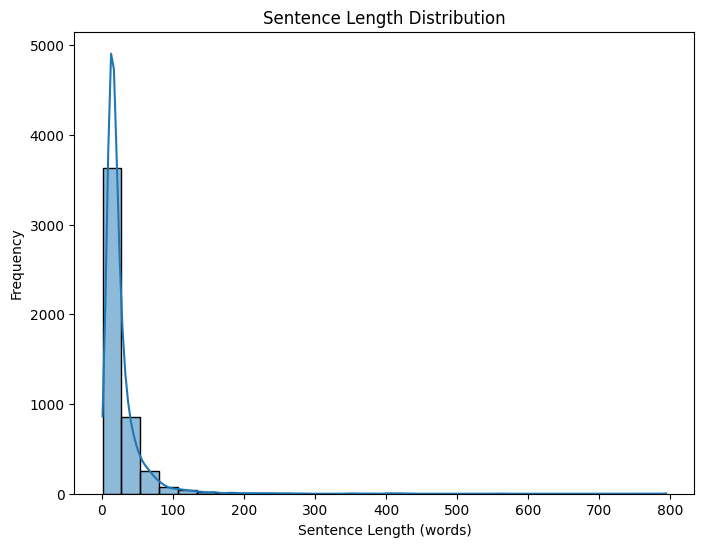

In [22]:
df['sentence_length'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['sentence_length'], kde=True, bins=30)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')
plt.show()

In [27]:
def frequent_word(data, sentiment_column, text_column):
    for sentiment in data[sentiment_column].unique():
        sentiment_data = data[data[sentiment_column] == sentiment]
        text = ' '.join(sentiment_data[text_column])
        word_freq = nltk.FreqDist(text.split())
        print(f"\nMost frequent words for {sentiment} sentiment:")
        print(word_freq.most_common(10))

frequent_word(df, 'sentiment', 'clean_text')


Most frequent words for Neutral sentiment:
[('card', 4874), ('work', 2511), ('use', 1994), ('phone', 1685), ('gb', 1487), ('not', 1359), ('great', 1354), ('buy', 1285), ('memory', 1269), ('sandisk', 1183)]

Most frequent words for Negative sentiment:
[('card', 530), ('phone', 201), ('gb', 175), ('work', 173), ('use', 153), ('not', 131), ('get', 102), ('format', 101), ('sandisk', 97), ('fast', 93)]

Most frequent words for Positive sentiment:
[('card', 131), ('gb', 63), ('work', 45), ('use', 40), ('speed', 36), ('sandisk', 35), ('not', 35), ('sd', 31), ('memory', 30), ('get', 28)]


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       919
           1       0.93      0.77      0.84       919
           2       0.92      1.00      0.96       919

    accuracy                           0.90      2757
   macro avg       0.90      0.90      0.90      2757
weighted avg       0.90      0.90      0.90      2757

Accuracy: 0.9017


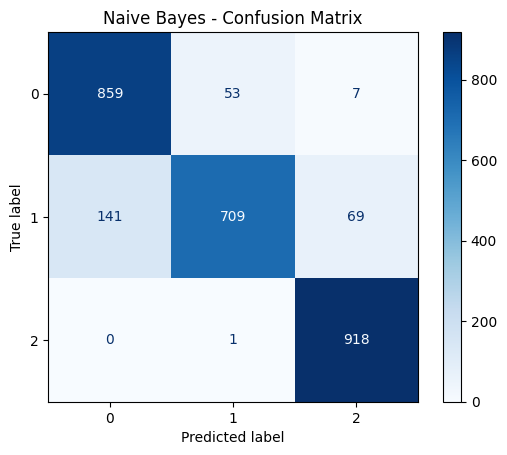

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)


print("=== Naive Bayes ===")
print(classification_report(y_test, nb_preds))
print(f"Accuracy: {accuracy_score(y_test, nb_preds):.4f}")
cm = confusion_matrix(y_test, nb_preds, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

In [30]:
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:59:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       919
           1       0.96      0.98      0.97       919
           2       1.00      0.99      0.99       919

    accuracy                           0.98      2757
   macro avg       0.98      0.98      0.98      2757
weighted avg       0.98      0.98      0.98      2757

Accuracy: 0.9786


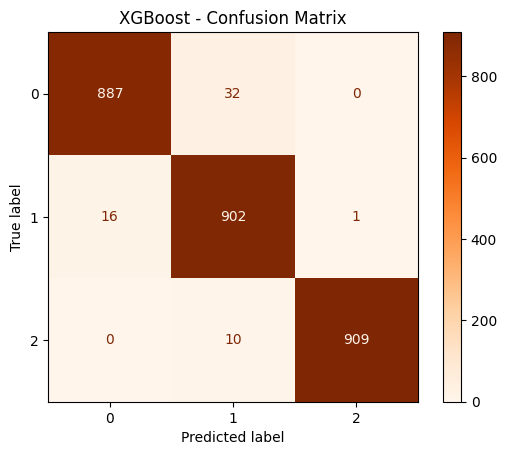

In [31]:
print("=== XGBoost ===")
print(classification_report(y_test, xgb_preds))
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
cm = confusion_matrix(y_test, xgb_preds, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


svm_params = {'C': [0.1, 1, 10]}
svm_grid = GridSearchCV(SVC(kernel='linear'), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_preds = svm_grid.predict(X_test)

In [ ]:
print("=== SVM ===")
print(f"Best Parameters: {svm_grid.best_params_}")
print(classification_report(y_test, svm_preds))
print(f"Accuracy: {accuracy_score(y_test, svm_preds):.4f}")
cm = confusion_matrix(y_test, svm_preds, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.show()

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [22]:
import pandas as pd
def load_txt_dataset(path):
    reviews = []
    labels = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            if len(line.strip()) == 0:
                continue
            label = line[0]
            review = line[2:].strip()
            labels.append(int(label))
            reviews.append(review)
    return pd.DataFrame({'review': reviews, 'label': labels})

train_df = load_txt_dataset('/content/stsa-train.txt')
test_df = load_txt_dataset('/content/stsa-test.txt')

In [23]:
train_df.head(30)

,review,label
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
5,campanella gets the tone just right -- funny i...,1
6,a fan film that for the uninitiated plays bett...,0
7,"béart and berling are both superb , while hupp...",1
8,"a little less extreme than in the past , with ...",0
9,the film is strictly routine .,0


In [24]:
print(train_df.head())
print("Train label distribution:\n", train_df['label'].value_counts())
print("Test label distribution:\n", test_df['label'].value_counts())

                                              review  label
0  a stirring , funny and finally transporting re...      1
1  apparently reassembled from the cutting-room f...      0
2  they presume their audience wo n't sit still f...      0
3  this is a visually stunning rumination on love...      1
4  jonathan parker 's bartleby should have been t...      1
Train label distribution:
 label
1    3610
0    3310
Name: count, dtype: int64
Test label distribution:
 label
0    912
1    909
Name: count, dtype: int64


In [25]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
train_df['clean_review'] = train_df['review'].apply(preprocess_text)
test_df['clean_review'] = test_df['review'].apply(preprocess_text)

In [49]:
from sklearn.model_selection import train_test_split

X = train_df['clean_review']
y = train_df['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_df['clean_review'])

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print("10-Fold CV Accuracy: ", scores.mean())

    model.fit(X, y)
    preds = model.predict(X_val_tfidf)

    print("Validation Accuracy:", accuracy_score(y_val, preds))
    print("Precision:", precision_score(y_val, preds))
    print("Recall:", recall_score(y_val, preds))
    print("F1 Score:", f1_score(y_val, preds))


In [52]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
evaluate_model(svm_model, X_train_tfidf, y_train)


10-Fold CV Accuracy:  0.7757225433526012
Validation Accuracy: 0.7630057803468208
Precision: 0.7727272727272727
Recall: 0.7727272727272727
F1 Score: 0.7727272727272727


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train_tfidf, y_train)


10-Fold CV Accuracy:  0.5073217726396917
Validation Accuracy: 0.5144508670520231
Precision: 0.5580524344569289
Recall: 0.3303769401330377
F1 Score: 0.415041782729805


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train_tfidf, y_train)


10-Fold CV Accuracy:  0.6678227360308285
Validation Accuracy: 0.6728323699421965
Precision: 0.6948955916473318
Recall: 0.664079822616408
F1 Score: 0.6791383219954649


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train_tfidf, y_train)

10-Fold CV Accuracy:  0.7360308285163777
Validation Accuracy: 0.7167630057803468
Precision: 0.7362385321100917
Recall: 0.7117516629711752
F1 Score: 0.7237880496054115


In [56]:
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb_model, X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

10-Fold CV Accuracy:  0.7098265895953757


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.6971098265895954
Precision: 0.7410714285714286
Recall: 0.6441241685144125
F1 Score: 0.6892052194543298


In [60]:
final_model = LinearSVC()
final_model.fit(X_train_tfidf, y_train)
test_preds = final_model.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(test_df['label'], test_preds))
print("Test Precision:", precision_score(test_df['label'], test_preds))
print("Test Recall:", recall_score(test_df['label'], test_preds))
print("Test F1 Score:", f1_score(test_df['label'], test_preds))

Test Accuracy: 0.7726523887973641
Test Precision: 0.7586206896551724
Test Recall: 0.7986798679867987
Test F1 Score: 0.7781350482315113


SVM: 0.7757
KNN: 0.5073
Decision Tree: 0.6630
Random Forest: 0.7362


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:54:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: 0.7098


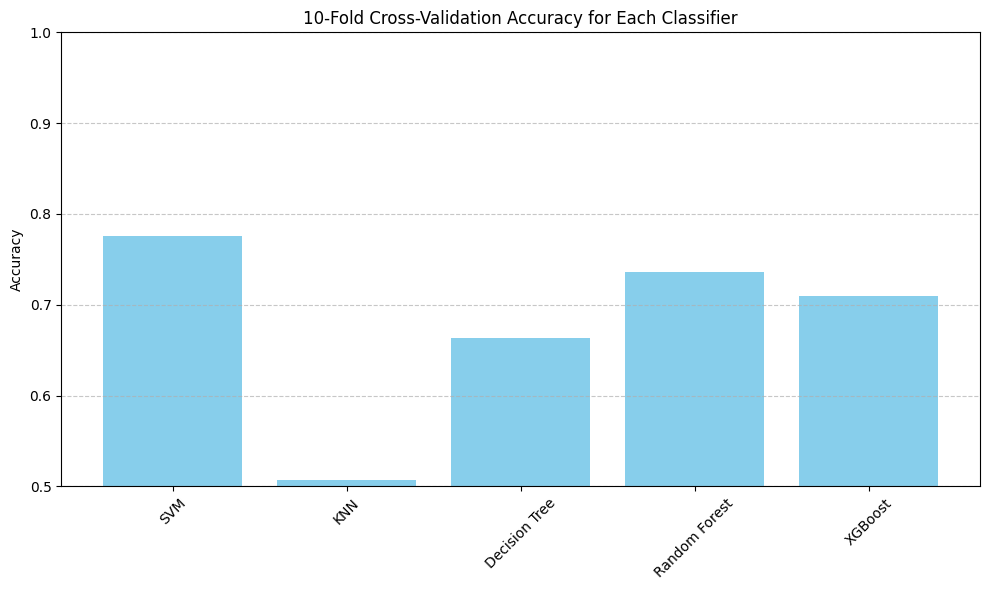

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Define models
models = {
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store accuracies
accuracy_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
    accuracy_scores[name] = scores.mean()
    print(f"{name}: {scores.mean():.4f}")

# Plot
plt.figure(figsize=(10,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title("10-Fold Cross-Validation Accuracy for Each Classifier")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(model, model_name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_val_tfidf)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.grid(False)
    plt.show()


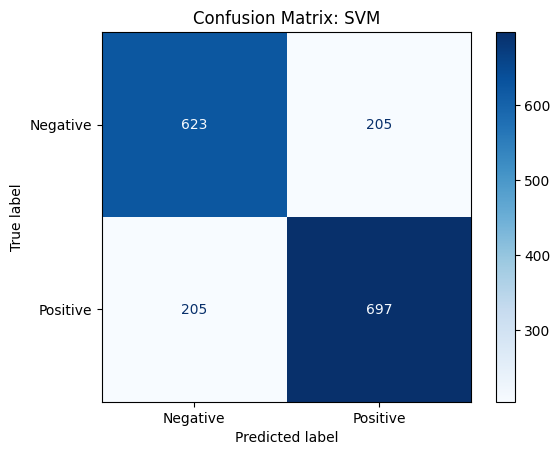

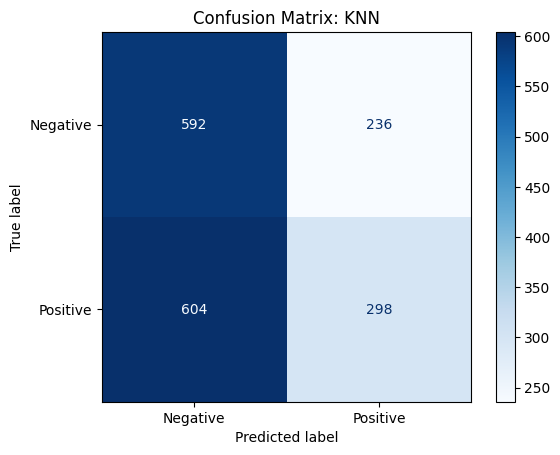

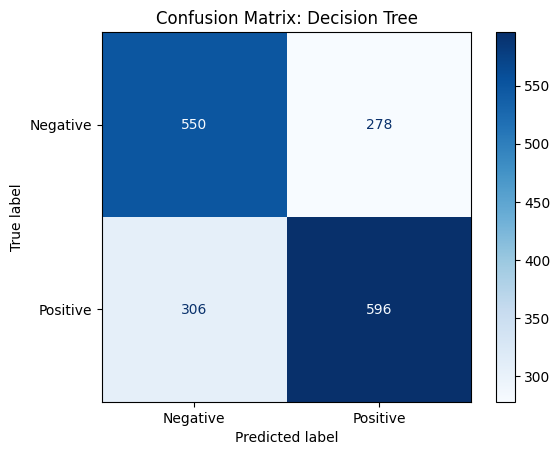

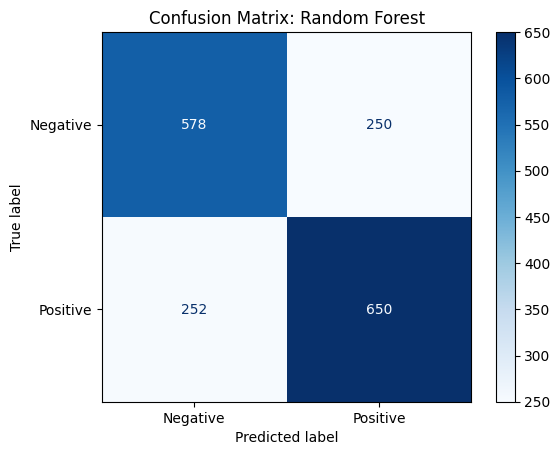

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:53:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


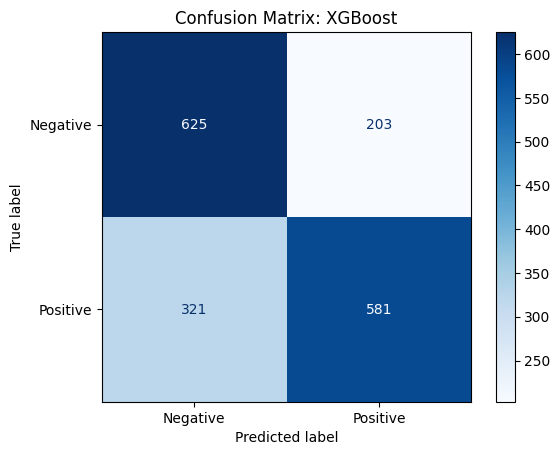

In [62]:
plot_conf_matrix(LinearSVC(), "SVM")
plot_conf_matrix(KNeighborsClassifier(n_neighbors=5), "KNN")
plot_conf_matrix(DecisionTreeClassifier(), "Decision Tree")
plot_conf_matrix(RandomForestClassifier(), "Random Forest")
plot_conf_matrix(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')

In [ ]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [ ]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
df.isnull().sum()

,0
Product Name,0
Brand Name,65171
Price,5933
Rating,0
Reviews,70
Review Votes,12296


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Product Name,0
Brand Name,0
Price,0
Rating,0
Reviews,0
Review Votes,0


In [ ]:
df.duplicated().sum()

np.int64(53079)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)


df['pre_text'] = df['Reviews'].apply(preprocess_text)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
features = vectorizer.fit_transform(df['pre_text'])

k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = model.fit_predict(features)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-14-d829c1f425c5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pre_text'] = df['Reviews'].apply(preprocess_text)
<ipython-input-14-d829c1f425c5>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,pre_text,cluster
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone u used hard phone ...,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,work good go slow sometimes good phone love,7
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...,2
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,already phone problem know stated used dang st...,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,charging port loose got soldered needed new ba...,18
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,phone look good would stay charged buy new bat...,18
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,originally using samsung galaxy sprint wanted ...,2
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,battery life great responsive touch issue some...,18


In [ ]:
print("Cluster centroids of each cluster: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :15]:
        print (' %s' % terms[j])
    print('------------')

Cluster centroids of each cluster: 

Cluster 0:
 good
 product
 phone
 expected
 great
 working
 iphone
 screen
 buy
 awesome
 thanks
 love
 thank
 use
 bad
------------
Cluster 1:
 great
 phone
 product
 price
 work
 buy
 condition
 deal
 seller
 thanks
 fast
 good
 problem
 far
 service
------------
Cluster 2:
 phone
 great
 good
 screen
 use
 love
 price
 camera
 best
 like
 really
 bought
 problem
 work
 got
------------
Cluster 3:
 ok
 phone
 price
 good
 far
 thanks
 work
 product
 expected
 thing
 todo
 camera
 working
 excellent
 battery
------------
Cluster 4:
 nice
 phone
 price
 good
 product
 love
 work
 really
 great
 fast
 watch
 cellphone
 camera
 thanks
 quality
------------
Cluster 5:
 work
 great
 phone
 perfectly
 good
 fine
 love
 problem
 expected
 product
 fast
 condition
 venezuela
 bought
 price
------------
Cluster 6:
 excelente
 producto
 gracias
 telefono
 recomendado
 teléfono
 celular
 product
 bueno
 muy
 servicio
 phone
 recomiendo
 muchas
 bien
---------

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
scaler = MaxAbsScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
ks = list(range(1, 31))

for i in ks:
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(scaled_features)
    wcss.append(clustering.inertia_)

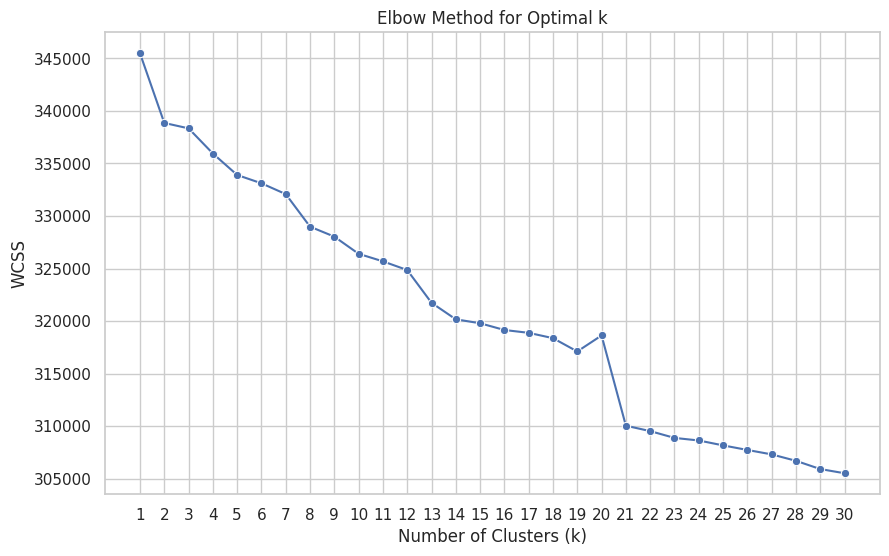

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(x=ks, y=wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 20):
    clustering = KMeans(n_clusters=i, random_state=42)
    clustering.fit(scaled_features)
    score = silhouette_score(scaled_features, clustering.labels_)
    print(f"Silhouette score for k={i}: {score}")

Silhouette score for k=2: -0.03108728438560979
Silhouette score for k=3: -0.03073339711174537


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical

*   List item
*   List item

clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

